In [66]:
# The directory for top level folder
dir_ = "/home/sugam/Work/10-19 NLP/12 Projects/Resume Builder/data/"

In [67]:
raw_data_dir = dir_ + 'raw/'
processed_data_dir = dir_+'Processed/'

# 1. Part-1

In [68]:
import pandas as pd
import numpy as np
import mplcatppuccin
import matplotlib as mpl
import re
import matplotlib.pyplot as plt
mpl.style.use(["ggplot", "mocha"])
plt.rcParams["figure.figsize"] = (25,8)

In [72]:
####################### LOAD DATA
##################################################################
def load_data(url: str) ->pd.DataFrame:
    """
    Loads the dataframe into memory

    Args:
      url (string) - the path to the dataframe

    Returns:
      df (pandas dataframe)
    """
    
    print("⏳ Loading Data")
    
    # Refering our data without any modification and dtype
    df = pd.read_csv(url)
        
    for col in list(df):  # List out the column names
        if "Unnamed" in col:  # Checks if the column contains Unnamed in it 
            df.drop(col, axis=1,inplace=True) # Removes the Garbage column
    
    print(f"✅ Done Loading")    
    return df


df_dir= raw_data_dir+"combined.csv"

df = load_data(df_dir)

⏳ Loading Data
✅ Done Loading


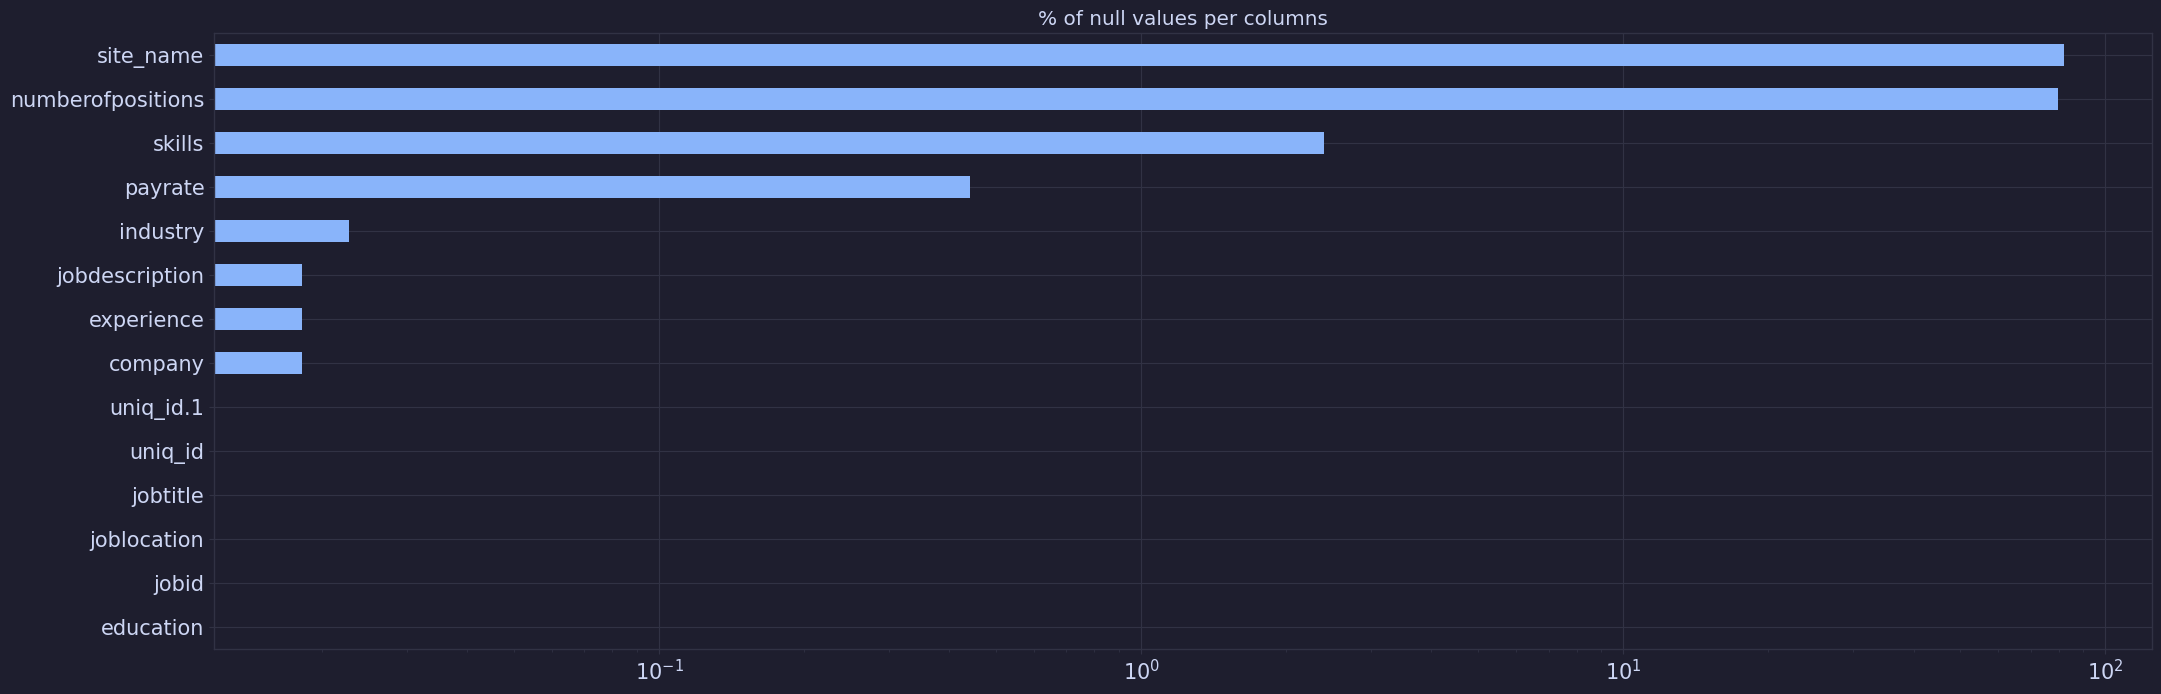

In [73]:
##### % of null values per column
(
    (
        (
            (
            df.isnull().sum())
            / len(df)
        )
        *100
    )
 .sort_values(ascending=True).
 astype(np.float16).
 plot(kind="barh", fontsize=15,log=True)
)
plt.title("% of null values per columns");

In [74]:
# Since there are more than 70% of null values present in columns "sitename" and "numberofposition" hence dropping the columns
df.drop(["site_name","numberofpositions","uniq_id","uniq_id.1","jobid"],axis=1,inplace=True)

In [75]:
df.fillna("Unknown",inplace=True)

In [77]:
def create_job_role (a:str)->str:  
    # a = str(df["jobdescription"][10])
    a = str(a)
    a = a.replace("Education Qualification-","Education-")
    role_match = re.search(r"Role:",a)
    edu_match = re.search(r"Education-",a)
    if (edu_match is not None) & (role_match is not None):
         return a[role_match.start()+5:edu_match.start()]
    elif (role_match is not None) & (edu_match is None):
        return a[role_match.start():]
    else:
        return "unknown"

df["job_role"] = df["jobdescription"].map(create_job_role)

In [78]:
df.drop("jobdescription",axis=1,inplace=True)

In [80]:
df.to_csv(processed_data_dir+"final.csv")